In [1]:
from random import *
import math
import matplotlib.pyplot

populacao = []
TAM = 100
i = 0
num_geracoes = 500
taxa_mutacao = 30
maiores = []
menores = []
media_ger = []

In [2]:
#-----------Cria a populacao------------------
while(i<TAM):
    v = [uniform(0,10),uniform(0,10),0]
    populacao = populacao + [v]
    i = i+1
print(populacao[0],populacao[1])
print("....")
print(populacao[TAM-1])

[7.257272699356698, 9.400011076316408, 0] [6.688689405744439, 6.432817562750581, 0]
....
[3.3643657194954835, 2.7376351073457195, 0]


In [3]:
#-------------Funcao de clonagem---------------------
def clonar(populacao):
        clonados = []
        for v in populacao:
            clonados = clonados + [v,v,v,v,v]
        return clonados
#--------------Funcoes para aptidao--------------
def Alpine(x1, x2):
        return (x1 ** (1 / 2) * math.sin(x1)) * (x2 ** (1 / 2) * math.sin(x2))
def funcaoObjetivo(populacao):
        sum = 0
        for vetor in populacao:
            vetor[2] = Alpine(vetor[0], vetor[1]) + 7
            sum = sum + vetor[2]
        return sum
#--------------Funcoes para selecao------------------
def obterMaior(populacao):
        maior = populacao[0]
        for v in populacao:
            if (v[2] > maior[2]):
                maior = v
        return maior
def selecionar(populacao):
        selecionados = []
        i = 0
        while i < len(populacao):
            v = [populacao[i]]+[populacao[i+1]]+[populacao[i+2]]+[populacao[i+3]]+[populacao[i+4]]
            v = obterMaior(v)
            selecionados = selecionados + [v]
            i = i + 5
        return selecionados
#-----------------Estudo da populacao-------------
#--- def obterMaior(populacao):
#              ....
def obterMenor(populacao):
        menor = populacao[0]
        for v in populacao:
            if (v[2] < menor[2]):
                menor = v
        return menor
#---------------Mutacao-----------------------------
def mutar(populacao):
        mutados = []
        for v in populacao:
            libera = uniform(0,100)
            if(libera < taxa_mutacao):
                valor = uniform(-1,1)
                if(v[0] + valor >=0 and v[0] + valor <=10  ):
                    v[0] = v[0]+valor
            libera = uniform(0, 100)
            if (libera < taxa_mutacao):
                valor = uniform(-1, 1)
                if (v[1] + valor >= 0 and v[1] + valor <=10):
                    v[1] = v[1] + valor
            mutados = mutados+ [[v[0],v[1],0]]
        return mutados

In [4]:
l = 0
while l<= num_geracoes:
    #------------Clonagem--------------------------
    populacao = clonar(populacao)
    # --------------Descobre Aptidao---------------------
    funcaoObjetivo(populacao)
    #---------------Mutacao-----------------------------
    populacao = mutar(populacao)
    sum = funcaoObjetivo(populacao)
    #---------------Selecionar--------------------------
    populacao = selecionar(populacao)
    sum = funcaoObjetivo(populacao)
    #----------Estudo da populacao------------
    maior = obterMaior(populacao)
    menor = obterMenor(populacao)
    media = sum / TAM
    maiores.append(maior[2])
    menores.append(menor[2])
    media_ger.append(media)

    l = l+1

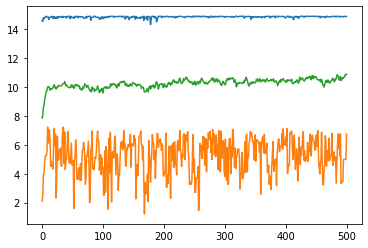

[7.913498311678374, 7.855413829514993, 14.870434428747227]


In [5]:
geracoes =[]
for v in range(0,num_geracoes+1):
    geracoes = geracoes +[v]

matplotlib.pyplot.plot(geracoes,maiores)
matplotlib.pyplot.plot(geracoes,menores)
matplotlib.pyplot.plot(geracoes,media_ger)
matplotlib.pyplot.show()
print(maior)